<a href="https://colab.research.google.com/github/marino1846067/CMP2021/blob/main/6_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCIPY

Scipy, or Scientific Python, is a collection of functions to perform basic scientific programming and data analysis.

Some of its contents are:
- Fourier transforms (`scipy.fft`)
- numerical integration (`scipy.integrate`)
- interpolation tools (`scipy.interpolate`)
- linear algebra routines (`scipy.linalg`)
- signal processing tools (`scipy.signal`)
- statistical functions (`scipy.stats`)

It is also the ecosystem for several scientific packages and provides a consistent interface to the functions, avoiding duplication.  The libraries `scikit-learn` (for machine learning) and `scikit-image` (for image processing) rely on `scipy` heavily.

In [ ]:
import scipy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

## Integrating with `scipy.integrate`

To integrate a list of numbers using `scipy`, you might use a function called `trapz` (for trapezoid, the type of integration being used), or `quad` (from quadrature), both from the `integrate` package.

In [ ]:
import scipy.integrate as integrate
result = integrate.trapz([0, 1, 2, 3, 4, 5])
print(result)

12.5


`trapz` here is assuming the $y$-values we provided are taken at evenly spaced values of $x$ with $\Delta x=1$.  You can provide specific values of $x$ with a list, or a different $\Delta x$ with the keyword `dx`.

In [ ]:
result = integrate.quad(np.sin, 0, np.pi)
print(result)

(2.0, 2.220446049250313e-14)


`quad` takes a function name and the limits of the integral, but no data points. It returns the integral with an estimate of the error.


Consider
$$
\int_0^2 x^4\log (x+\sqrt{x^2+1}) dx\,.
$$



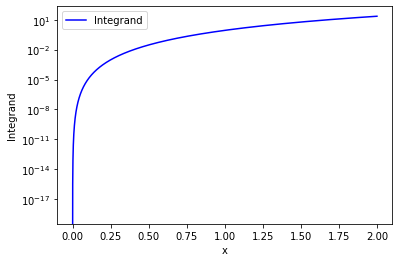

In [ ]:
%matplotlib inline

#import matplotlib.pyplot as plt

x = np.linspace(0, 2, 10000)

def integrand(x):
    return x**4*np.log(x+np.sqrt(x**2+1))

y = integrand(x)

plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Integrand')
plt.plot(x, y, 'b-', label='Integrand')
plt.legend()

Notice that at low $x$-values the integrand hardly varies.  The `scipy.integrate.quad()` routine is **adaptive**, i.e., it adjusts the integrand evaluations to concentrate where its variations are more significant.

In [ ]:
print(integrate.quad(integrand, 0, 2))

(8.153364119811167, 9.052052573966981e-14)


## Integrating ODEs with `scipy.integrate.odeint`

Many physical phenomena are modeled by differential equations: oscillations of simple systems (spring-mass, pendulum, etc.), fluid mechanics (Navier-Stokes, Laplace's, etc.), quantum mechanics (Schrödinger’s), etc.  Here is how to numerically solve equations of this kin, in relatively simple cases...

The example looks at the 1D dynamics of a spring (with rest length $L$ and elastic constant $k$) and  mass $m$ in the presence of a drag force (with drag coefficient $\beta$).  Newton’s second law reads:
$$
{{d^2x}\over {dt^2}} + {\beta \over m}{{dx}\over {dt}} + {k\over m}(x-L) = 0\,.
$$
To solve this numerically we rever to `scipy.integrate.odeint`, for which a call has the syntax
```Python
scipy.integrate.odeint(func, y0, t, args=())
```
`func` is the **system of first order equations**, the array `y0` contains the initial values, time `t` is an array of time values, and arguments `args()` contains the parameters of `func` (here $L$, $k$, $m$, and $\beta$).  The unknowns in a system of differential equations are functions: `odeint` will return the values of these functions at the values provided via `t`.

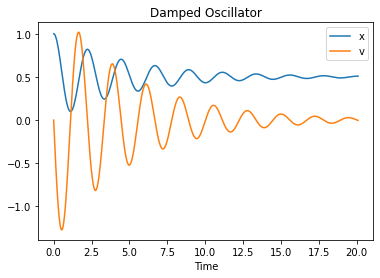

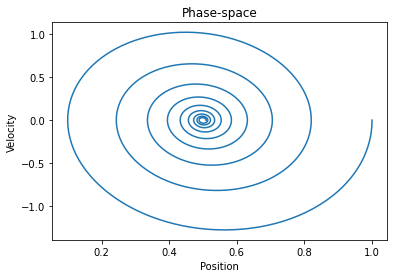

In [ ]:
from scipy.integrate import odeint
 
# The system of first order ODEs: returns dx/dt, dv/dt
def odes(u, t):
    x, v = u
    return (v, (-k*(x-L) - beta*v)/m)

# Sampling times
t = np.arange(0, 20.1, 0.01)

# Initial values of x, v
u0 = np.array([1,0])
 
# Assume certain values of the physical parameters
beta = 0.4
k = 8.0
L = 0.5
m = 1.0

# Solve the ODEs
u = odeint(odes, u0, t)

# Plot x and v vs t using matplotlib
# u[:,0] is x
plt.plot(t, u[:,0], label='x')
# u[:,1] is v
plt.plot(t, u[:,1], label='v')
plt.title('Damped Oscillator')
plt.xlabel('Time')
plt.legend()
plt.show()

# Plot in phase space using matplotlib
plt.plot(u[:,0],u[:,1])
plt.title('Phase-space')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.show()

## Fitting Data with `scipy.optimize.curve_fit`

The `scipy.optimize` package provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding, and curve fitting.

A typical use case is to fit data to scientific models and estimate the model parameters.  This can be easily achieved with [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In this example we:

1. generate some data according to a model
1. add some random noise to the data
1. write the data to file
1. read back the data with numpy
1. fit the data with `curve_fit`

### 1. Generate data

In [ ]:
nevents = 100

x = np.linspace(10, 100, nevents)

def background(t, A=100, tau=10):
    return A * np.exp(-t/tau)

y = background(x)

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100,)
(100,)


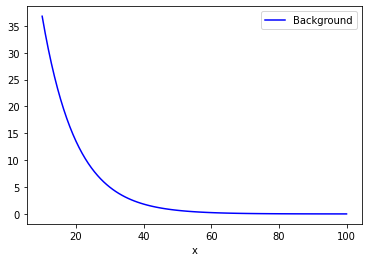

In [ ]:
%matplotlib inline

#import matplotlib.pyplot as plt

plt.plot(x, y, 'b-', label='Background')
plt.xlabel('x')
plt.legend()

### 2. Add random noise to the background

In [ ]:
noise = 3 * np.random.normal(size=x.size)

y_noise = y + noise

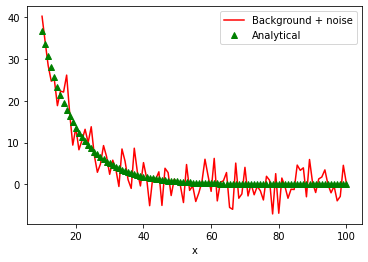

In [ ]:
#%matplotlib notebook
plt.plot(x, y_noise, 'r-', label='Background + noise')
plt.plot(x, y, 'g^', label='Analytical')
plt.xlabel('x')
plt.legend()

### 3. Write data to file

This time we use `numpy.savetxt` and loop over the arrays.

In [ ]:
fname = 'data.txt'

with open(fname,'w') as f:
    for i in range(len(x)):
        f.writelines("%.5f %.5f %.5f" % (x[i], y[i], y_noise[i]))
        f.write('\n')

In [ ]:
!cat data.txt

10.00000 36.78794 40.20787
10.90909 33.59110 34.15394
11.81818 30.67206 28.38377
12.72727 28.00668 24.67887
13.63636 25.57292 25.04687
14.54545 23.35065 18.81812
15.45455 21.32149 22.30094
16.36364 19.46867 22.06495
17.27273 17.77686 26.12436
18.18182 16.23206 16.92050
19.09091 14.82151 9.38036
20.00000 13.53353 13.51542
20.90909 12.35747 8.26049
21.81818 11.28362 10.55352
22.72727 10.30308 13.16199
23.63636 9.40775 9.97164
24.54545 8.59022 13.76866
25.45455 7.84374 6.92119
26.36364 7.16212 2.87731
27.27273 6.53974 4.85542
28.18182 5.97144 9.26303
29.09091 5.45253 6.59593
30.00000 4.97871 2.39149
30.90909 4.54606 5.77428
31.81818 4.15101 3.62759
32.72727 3.79029 -0.52146
33.63636 3.46092 8.45032
34.54545 3.16017 5.53655
35.45455 2.88555 1.06265
36.36364 2.63480 -0.98004
37.27273 2.40584 8.63638
38.18182 2.19677 2.96321
39.09091 2.00587 -0.39086
40.00000 1.83156 5.18836
40.90909 1.67240 1.56262
41.81818 1.52707 -5.11587
42.72727 1.39437 1.58920
43.63636 1.27320 1.27392
44.54545 1.16256 

### 4. Read data from file

In [ ]:
t, z, w = np.loadtxt(fname, unpack=True)
print(t.shape)
print(z.shape)
print(w.shape)

(100,)
(100,)
(100,)


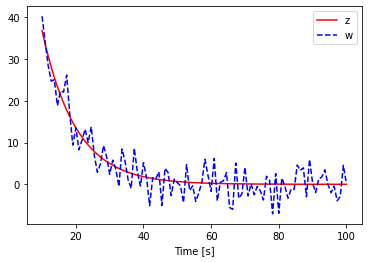

In [ ]:
#%matplotlib notebook
plt.plot(t, z, 'r-', label='z')
plt.plot(t, w, 'b--', label='w')

plt.xlabel('Time [s]')
plt.legend()

### 5. Fit data

`curve_fit` takes at least three arguments:
1. the function that you want to fit;
1. a set of independent data;
1. a set of dependent data.

We will keep using NumPy arrays for the data.  One can also:
4. provide initial guesses for the function parameters in a keyword `p0`;
5. give relative or absolute errors on the dependent data using the keyword `sigma` (and `absolute_sigma`).

In [ ]:
def fitfunc(x, N, alpha, c):
    return N*np.exp(-alpha*x) + c

param_labels = ['N', 'alpha', 'c']

In [ ]:
from scipy.optimize import curve_fit

fit_pars, cov_matrix = curve_fit(fitfunc, t, w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


In [ ]:
print(fit_pars)

[ 9.91807170e+01  9.82915429e-02 -3.36024303e-01]


In [ ]:
print(cov_matrix)

[[1.41917015e+02 9.55097302e-02 1.96228160e+00]
 [9.55097302e-02 7.30441867e-05 2.07090104e-03]
 [1.96228160e+00 2.07090104e-03 2.04459446e-01]]


In [ ]:
for i in range(3):
    print(fit_pars[i], "+/-", cov_matrix[i, i]**0.5)

99.18071695237191 +/- 11.912892785894757
0.09829154291511531 +/- 0.00854658918303631
-0.3360243034725031 +/- 0.4521719210829457


In [ ]:
for i in range(3):
    print("{0: .1f}% error on parameter {1}".format(np.abs(100*cov_matrix[i, i]**0.5/fit_pars[i]), param_labels[i]))

 12.0% error on parameter N
 8.7% error on parameter alpha
 134.6% error on parameter c


In [ ]:
fit_pars_guess, cov_matrix_guess = curve_fit(fitfunc, t, w, p0=[100., 0.1, 0.])

In [ ]:
for i in range(3):
    print("{0: .1f}% error on parameter {1}".format(np.abs(100*cov_matrix_guess[i, i]**0.5/fit_pars_guess[i]), param_labels[i]))

 12.0% error on parameter N
 8.7% error on parameter alpha
 134.6% error on parameter c


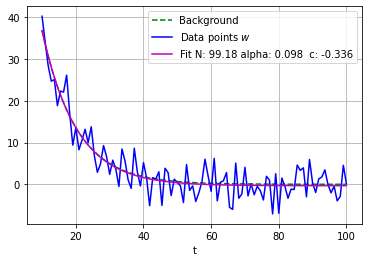

In [ ]:
#%matplotlib notebook
plt.plot(x, y, 'g--', label='Background')

plt.plot(t, w, 'b-', label='Data points $w$')

plt.plot(t, fitfunc(t, *fit_pars), 'm-', label='Fit N: %.2f alpha: %.3f  c: %.3f' % tuple(fit_pars))

plt.legend()
plt.xlabel('t')
plt.grid()